In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

link = 'https://raw.githubusercontent.com/MFuchs1989/Datasets-and-Miscellaneous/main/datasets/bank-additional-full.csv'
basedatos = pd.read_csv(link, sep=';')

encoder_y = LabelBinarizer()
y_encoder = encoder_y.fit_transform(basedatos.y.values.reshape(-1,1))
basedatos['conversion'] = y_encoder


#pregunta 1
basedatos.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
conversion          int32
dtype: object

In [6]:
basedatos.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [7]:
print('Conversiones Absolutas: %i de %i' %(basedatos.conversion.sum(),basedatos.shape[0]))
print('Taza de conversion: %0.2f%%' % (basedatos.conversion.sum() / basedatos.shape[0]* 100.0))

Conversiones Absolutas: 4640 de 41188
Taza de conversion: 11.27%


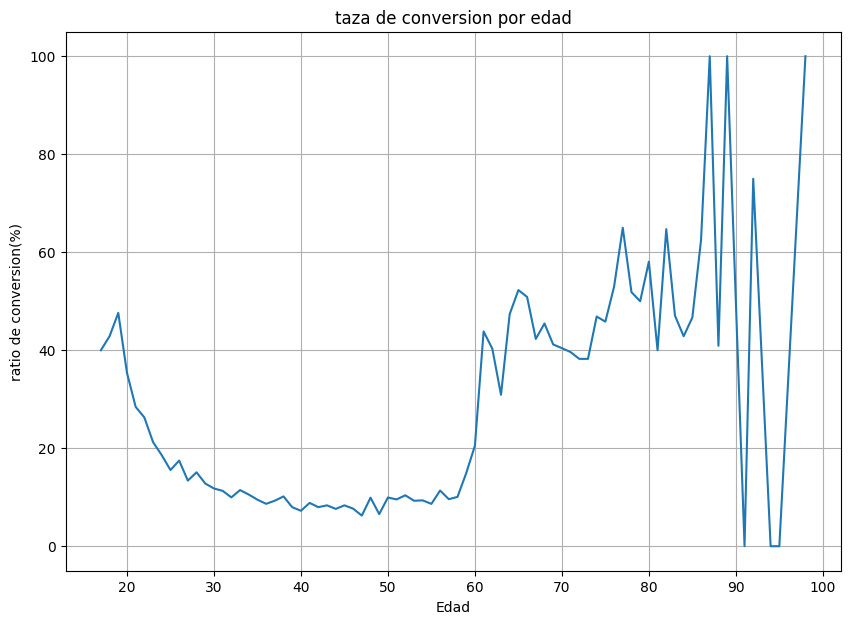

In [8]:
conversion_rate_by_age = basedatos.groupby(by='age')['conversion'].sum() / basedatos.groupby(by='age')['conversion'].count() * 100.0

ax = conversion_rate_by_age.plot(
    grid= True,
    figsize = (10,7),
    title = 'taza de conversion por edad')

ax.set_xlabel('Edad')
ax.set_ylabel('ratio de conversion(%)')

plt.show()

In [9]:
def age_group_function(basedatos):
    if basedatos['age'] > 70:
        return "70<"
    elif 70 >= basedatos['age'] > 60:
        return '[60, 70]'
    
    elif 60 >= basedatos['age'] > 50:
        return '[50, 60]'
    
    elif 50 >= basedatos['age'] > 40:
        return '[40, 50]'
    
    elif 40 >= basedatos['age'] > 30:
        return '[30, 40]'
    
    elif 30 >= basedatos['age'] > 20:
        return '[20, 30]'
    
    elif basedatos['age'] <= 20:
        return '<20'

basedatos['age_group'] = basedatos.apply(age_group_function, axis=1)
conversion_rate_by_age_group = basedatos.groupby(by='age_group')['conversion'].sum() / basedatos.groupby(by='age_group')['conversion'].count() * 100.0
conversion_rate_by_age_group

age_group
70<         47.867299
<20         40.714286
[20, 30]    14.731465
[30, 40]     9.746720
[40, 50]     8.173828
[50, 60]    10.653907
[60, 70]    43.442623
Name: conversion, dtype: float64

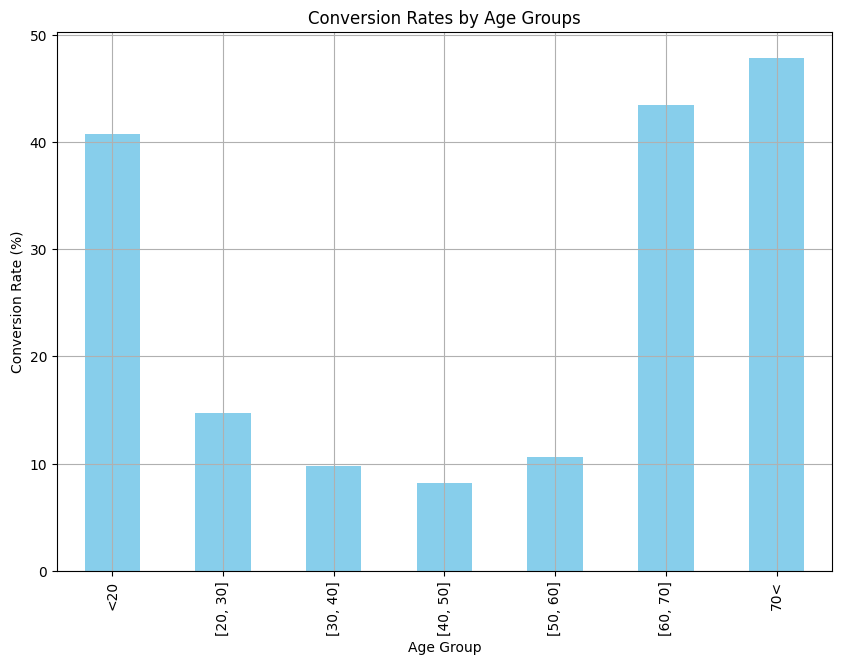

In [10]:
ax = conversion_rate_by_age_group.loc[['<20', '[20, 30]', '[30, 40]', '[40, 50]', '[50, 60]', '[60, 70]', '70<']].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('Age Group')
ax.set_ylabel('Conversion Rate (%)')

plt.show()


In [11]:
conversion_by_marital_status = pd.pivot_table(basedatos, values = 'y', index='marital', columns='conversion',aggfunc=len)
conversion_by_marital_status.columns = ['non_conversions','conversions']
conversion_by_marital_status

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


array([<Axes: ylabel='non_conversions'>, <Axes: ylabel='conversions'>],
      dtype=object)

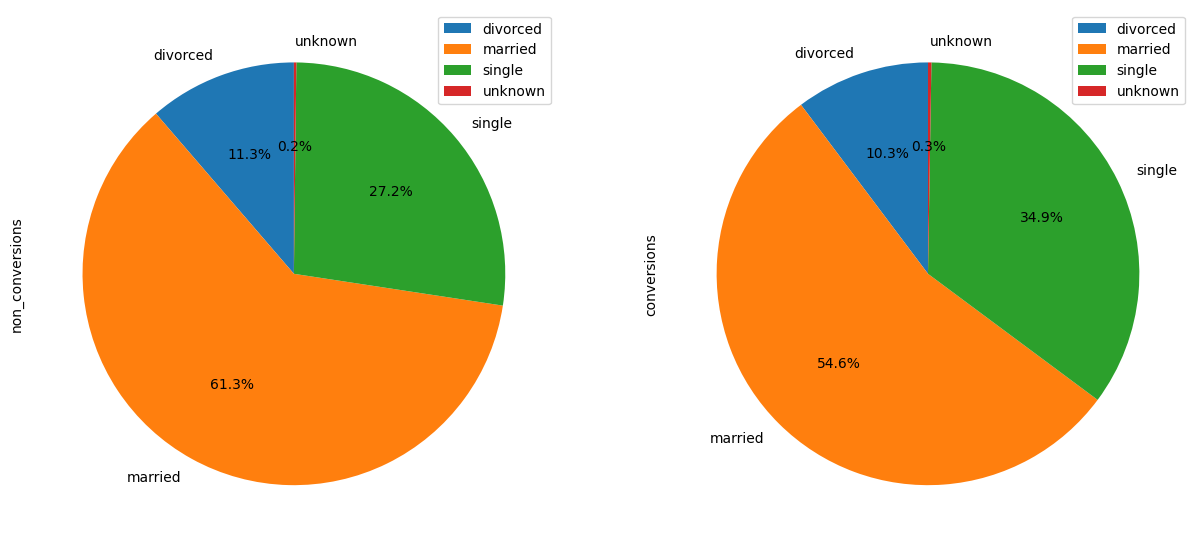

In [12]:
conversion_by_marital_status.plot(
    kind='pie',
    figsize=(15, 7),
    startangle = 90,
    subplots = True,
    autopct = lambda x: '%0.1f%%' % x
)

In [13]:
age_marital = basedatos.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

age_marital

marital,divorced,married,single,unknown
age_group,,,,
70<,60.0,136.0,6.0,0.0
<20,0.0,0.0,57.0,0.0
"[20, 30]",18.0,242.0,804.0,3.0
"[30, 40]",135.0,867.0,591.0,4.0
"[40, 50]",126.0,588.0,120.0,3.0
"[50, 60]",112.0,517.0,38.0,1.0
"[60, 70]",25.0,182.0,4.0,1.0


In [14]:
age_marital = age_marital.divide(
    basedatos.groupby(by = 'age_group')['conversion'].count(),axis = 0)
age_marital

marital,divorced,married,single,unknown
age_group,,,,
70<,0.142180,0.322275,0.014218,0.000000
<20,0.000000,0.000000,0.407143,0.000000
"[20, 30]",0.002485,0.033412,0.111004,0.000414
"[30, 40]",0.008239,0.052914,0.036070,0.000244
"[40, 50]",0.012305,0.057422,0.011719,0.000293
"[50, 60]",0.017863,0.082456,0.006061,0.000159
"[60, 70]",0.051230,0.372951,0.008197,0.002049


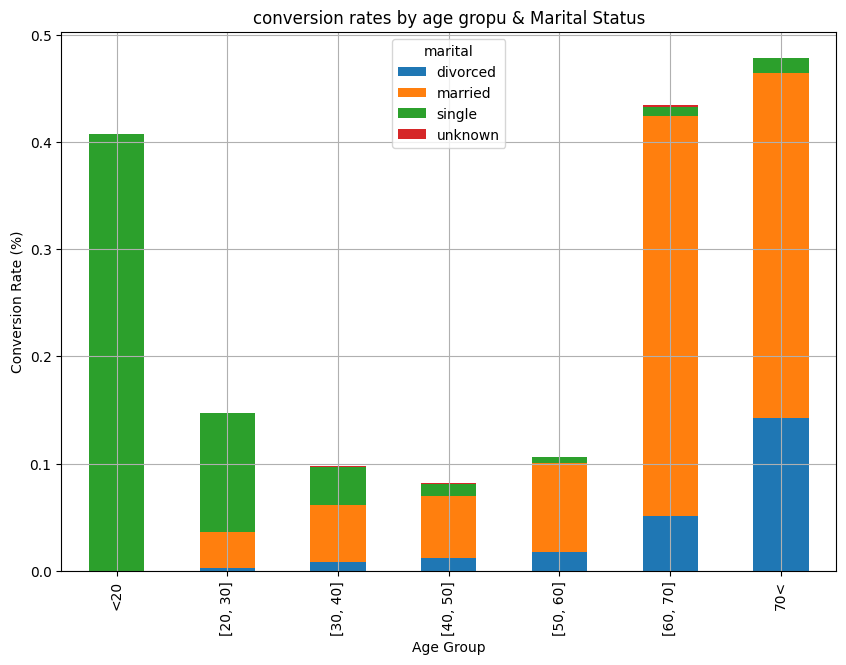

In [15]:
ax = age_marital.loc[['<20', '[20, 30]', '[30, 40]', '[40, 50]', '[50, 60]', '[60, 70]', '70<']].plot(
    kind='bar',
    stacked = True,
    grid=True,
    figsize=(10, 7)
)

ax.set_title('conversion rates by age gropu & Marital Status')
ax.set_xlabel('Age Group')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

In [16]:
print('Conversiones Absolutas: %i de %i' % (basedatos.conversion.sum(), basedatos.shape[0]))

education_conversion = basedatos.groupby('education')['conversion'].sum().reset_index()
education_conversion['conversion_rate'] = education_conversion['conversion'] / basedatos.shape[0] * 100.0

print('\nTasa de conversión por nivel educativo:')
for index, row in education_conversion.iterrows():
    print('%s: %i (%0.2f%%)' % (row['education'], row['conversion'], row['conversion_rate']))


Conversiones Absolutas: 4640 de 41188

Tasa de conversión por nivel educativo:
basic.4y: 428 (1.04%)
basic.6y: 188 (0.46%)
basic.9y: 473 (1.15%)
high.school: 1031 (2.50%)
illiterate: 4 (0.01%)
professional.course: 595 (1.44%)
university.degree: 1670 (4.05%)
unknown: 251 (0.61%)


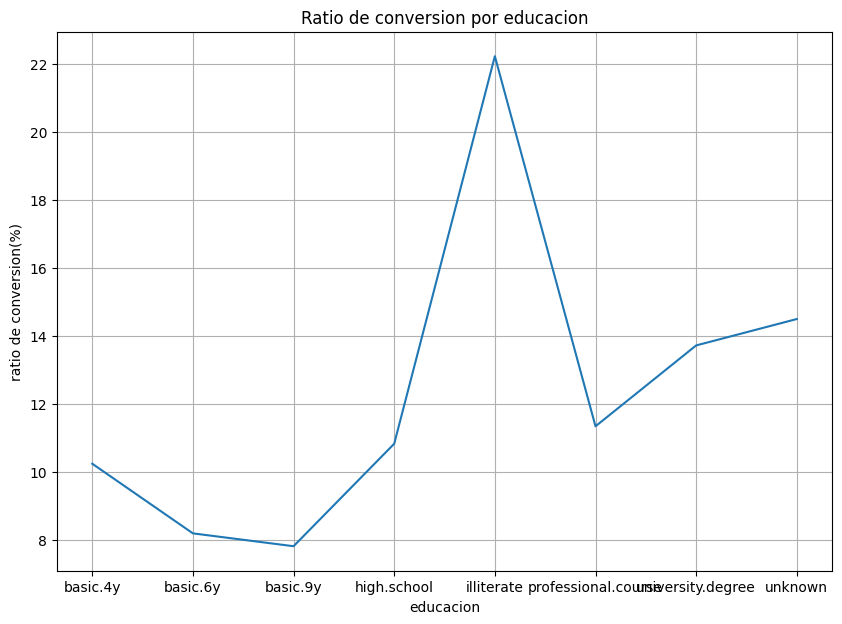

In [17]:
conversion_educativo = basedatos.groupby(by='education')['conversion'].sum() / basedatos.groupby(by='education')['conversion'].count() * 100.0

ax = conversion_educativo.plot(
    grid= True,
    figsize = (10,7),
    title = 'Ratio de conversion por educacion')

ax.set_xlabel('educacion')
ax.set_ylabel('ratio de conversion(%)')

plt.show()

In [18]:
education_age_conversion = basedatos.pivot_table(values='conversion', index='education', columns='age_group', aggfunc='sum', fill_value=0)

education_age_conversion['conversion_rate'] = education_age_conversion.sum(axis=1) / basedatos['conversion'].sum() * 100.0

print('Tasa de conversión por nivel educativo y grupo etario:')
print(education_age_conversion)


Tasa de conversión por nivel educativo y grupo etario:
age_group            70<  <20  [20, 30]  [30, 40]  [40, 50]  [50, 60]   
education                                                               
basic.4y             107    7        13        45        61       125  \
basic.6y               5    5        22        79        55        17   
basic.9y               7    9       115       160        97        83   
high.school           11   12       335       345       180       110   
illiterate             1    0         0         1         1         1   
professional.course   19    0       121       229       109        89   
university.degree     22    1       410       696       284       211   
unknown               30   23        51        42        50        32   

age_group            [60, 70]  conversion_rate  
education                                       
basic.4y                   70         9.224138  
basic.6y                    5         4.051724  
basic.9y          

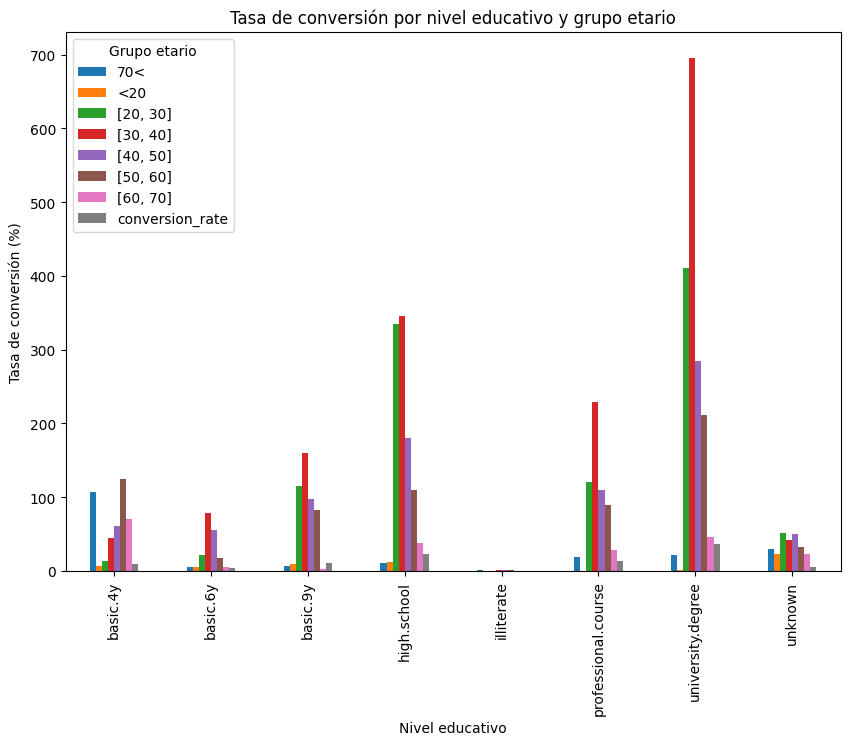

In [19]:

education_age_conversion.plot(
    kind='bar', 
    figsize=(10, 7))


plt.title('Tasa de conversión por nivel educativo y grupo etario')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de conversión (%)')
plt.legend(title='Grupo etario')

plt.show()